In [1]:
#https://math.stackexchange.com/questions/1287634/implementing-ornstein-uhlenbeck-in-matlab
#https://www.pik-potsdam.de/members/franke/lecture-sose-2016/introduction-to-python.pdf
#https://scikit-learn.org/stable/modules/model_evaluation.html

import numpy as np
import matplotlib.pyplot as plt
from math import *
plt.style.use('classic')
from sklearn.metrics import mean_squared_error
import seaborn as sns


'''o processo ornstein-uhlenbeck satisfaz a SDE 
        dxt=θ(μ−xt)dt+σdWt
        discretizando :
        Xn+1=Xn+θ(μ−Xn)Δt+σΔWn
              
'''

'o processo ornstein-uhlenbeck satisfaz a SDE \n        dxt=θ(μ−xt)dt+σdWt\n        discretizando :\n        Xn+1=Xn+θ(μ−Xn)Δt+σΔWn\n              \n'

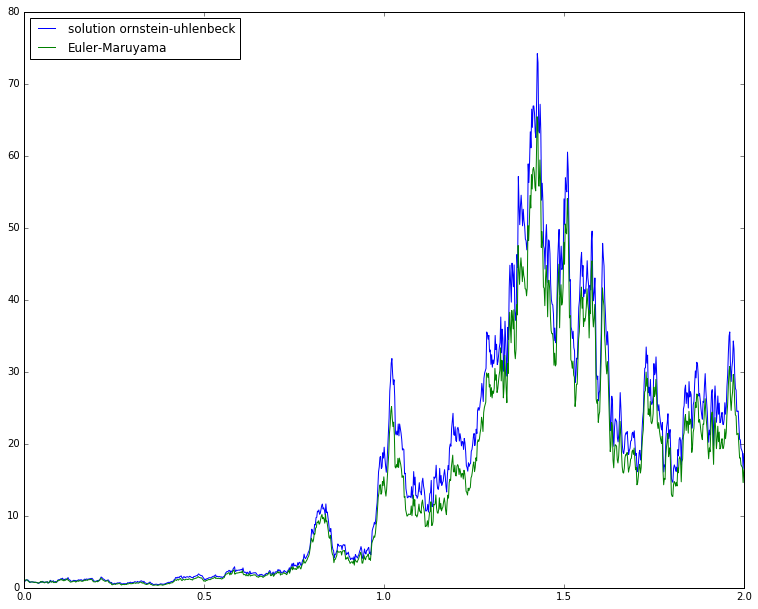

In [4]:
T=2; N=2**10;
#parametros
lamb=1; mu=2; Xzero=1
dt = T/N
dW=np.sqrt(dt)*np.random.randn(1,N)
W=np.cumsum(dW)
R=1; Dt=R*dt; L=N/R; #Parâmetros, Dt é um arbitrário de iterações
Xem=np.zeros(int(L)+1)
t=np.linspace(0,T,N+1)
Xtrue=np.zeros(len(t)+1)
aux=-2*lamb*t[1:]
Xtrue=Xzero*np.exp((-lamb)*t[1:]+mu*W); Xtrue=np.insert(Xtrue,0,Xzero)

Xtrue=np.insert(Xtrue, 0, Xzero)
Xem=np.zeros(int(L)+1); 
Xem[0] = Xzero
for j in range(1, int(L)+1):
    Winc=np.sum(dW[0][range(R*(j-1),R*j)])
    Xem[j] = Xem[j-1] + Dt*lamb*Xem[j-1]+ mu*Winc*Xem[j-1]



fig = plt.figure(figsize=(10, 8))
ax1=fig.add_axes([0,0,1,1])
ax1.plot(np.linspace(0,T,N+2), Xtrue, label='solution ornstein-uhlenbeck');
ax1.plot(np.linspace(0, T, int(L)+1), Xem,label='Euler-Maruyama');  
ax1.legend(loc = 'upper left')
